<a href="https://colab.research.google.com/github/Moutaz-Code/CancerModelColab/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from google.colab import drive

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os

# Read the Dataset and store it in DATA

In [ ]:
path_to_directory = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

file_path = os.path.join(path_to_directory, 'global_cancer_patients_2015_2024.csv')

DATA = pd.read_csv(file_path)

# Explore the Dataset

In [ ]:
DATA

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [ ]:
# No null values
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
# mean vary significanlty between each attribute ==> Normalization is NEEDED!!!
# std not very high. Suggesting the distribution is good in each attribute
DATA.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [ ]:
# DATA DataFrame does not contain any duplicate rows
DATA.duplicated().sum()

np.int64(0)

## Drop Patient ID

In [ ]:
# prompt: from DATA datafrom, drop the Patient_ID

DATA = DATA.drop('Patient_ID', axis=1)

## Convert the Country into Numerical and Drop it

In [ ]:
# prompt: convert the country into numerical in the DATA

# convert the Country to numerical
le = LabelEncoder()
DATA['Country_Region'] = le.fit_transform(DATA['Country_Region'])

In [ ]:
DATA['Country_Region']

,Country_Region
0,8
1,3
2,6
3,8
4,1
...,...
49995,6
49996,9
49997,6
49998,1


In [ ]:
# Correlation is too low, so drop it
DATA[['Country_Region', 'Target_Severity_Score']].corr()


,Country_Region,Target_Severity_Score
Country_Region,1.0000,0.0058
Target_Severity_Score,0.0058,1.0000


In [ ]:
DATA = DATA.drop('Country_Region', axis=1)

#### Convert the Year into Numerical and Drop it

In [ ]:
# Correlation is too low, so drop it
DATA[['Year', 'Target_Severity_Score']].corr()


,Year,Target_Severity_Score
Year,1.000000,0.002109
Target_Severity_Score,0.002109,1.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Target_Severity_Score'].plot(kind='hist', bins=20, title='Target_Severity_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Year', y='Target_Severity_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Target_Severity_Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Target_Severity_Score'}, axis=1)
              .sort_values('Target_Severity_Score', ascending=True))
  xs = counted['Target_Severity_Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Target_Severity_Score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Target_Severity_Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Target_Severity_Score'].plot(kind='line', figsize=(8, 4), title='Target_Severity_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Correlation is too low, so drop it
DATA = DATA.drop('Year', axis=1)

## Check Outliers of each Attribute

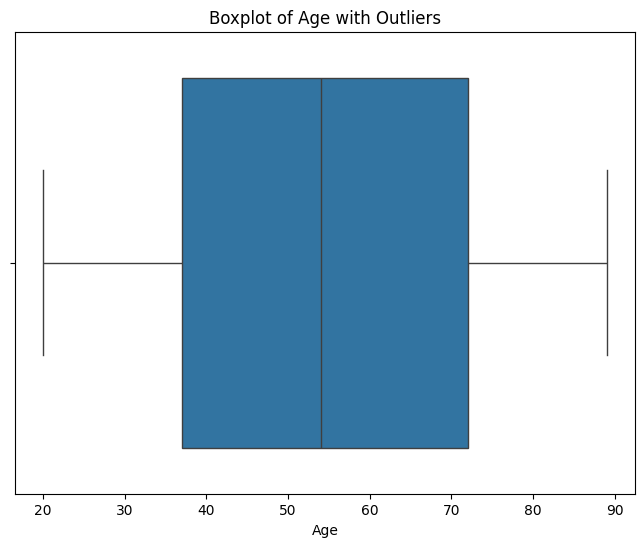

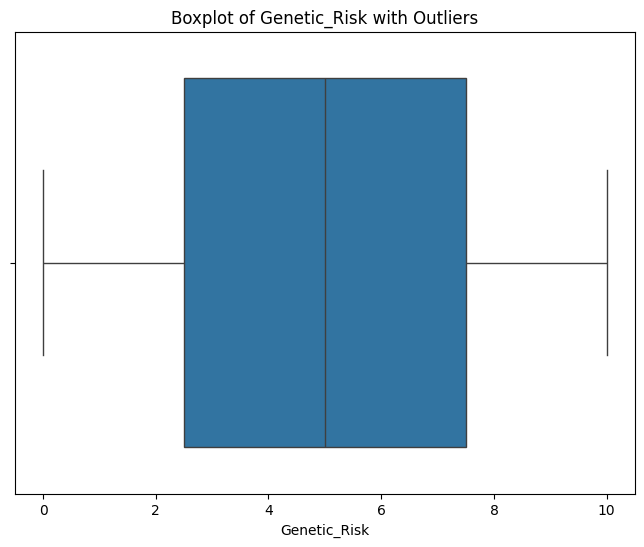

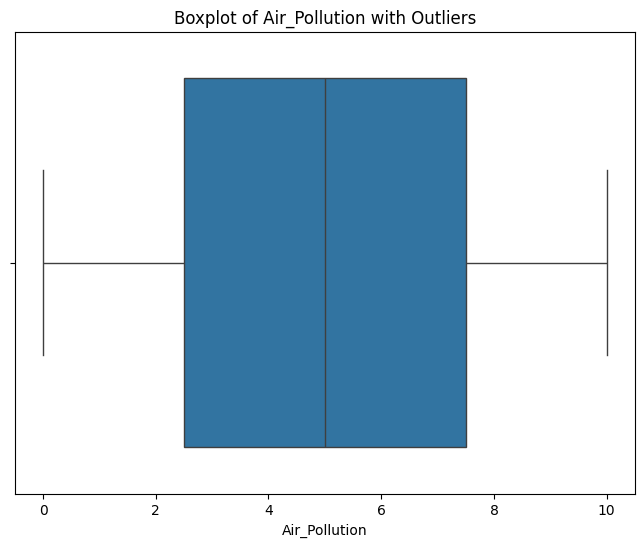

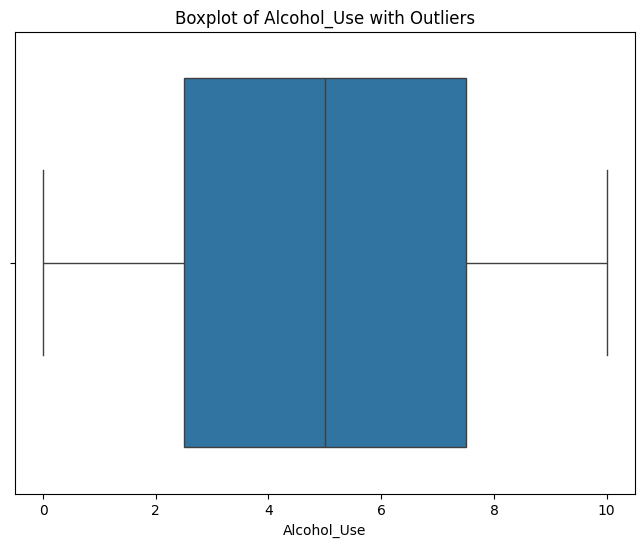

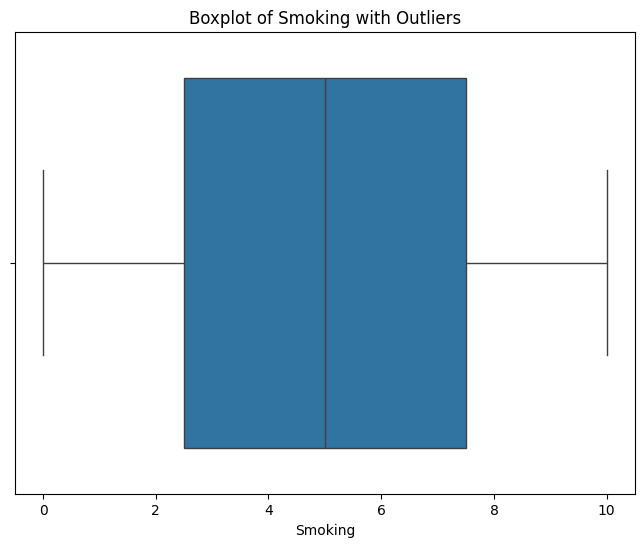

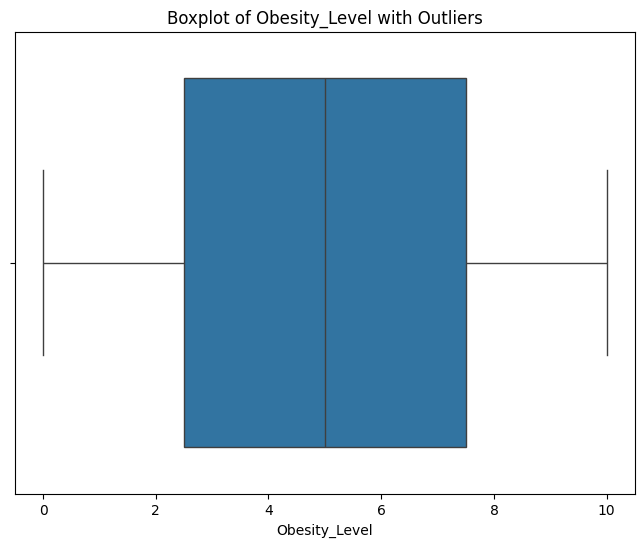

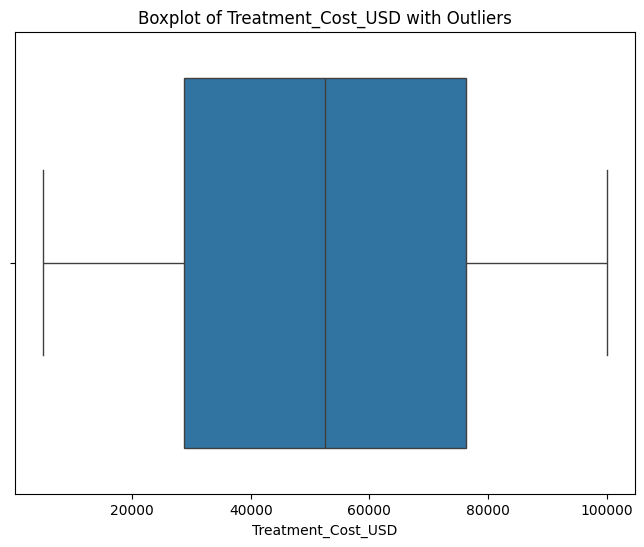

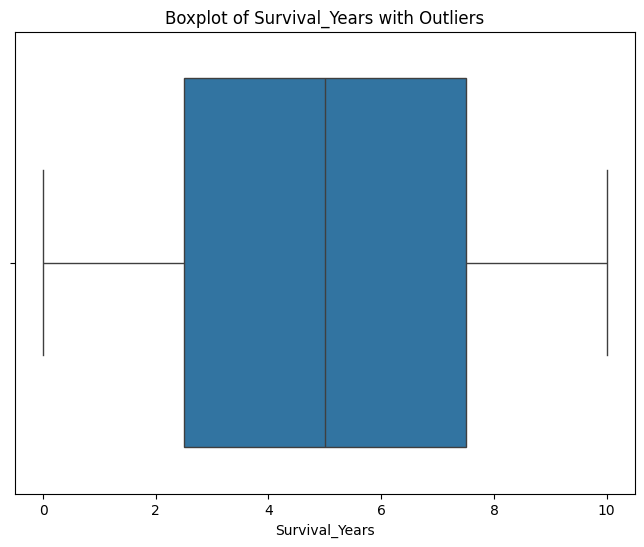

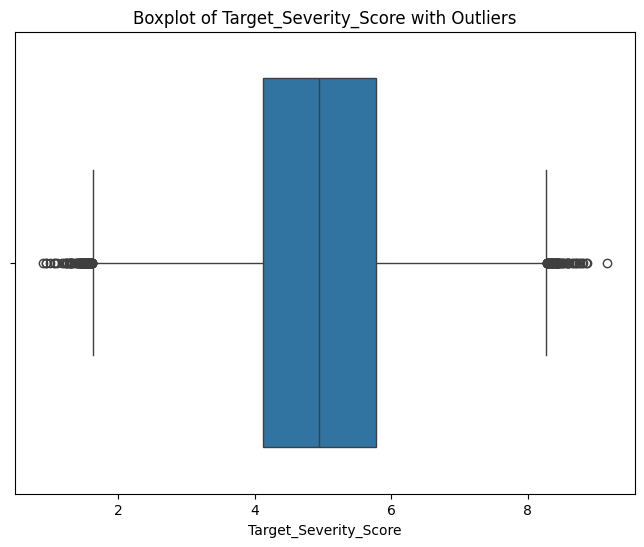

In [ ]:
# prompt: # prompt: identify if the data has outliers each one in separate graph?

def detect_outliers_iqr(df, col):
  """
  Detects outliers in a DataFrame column using the IQR method and plots a boxplot.

  Args:
    df: pandas DataFrame.
    col: Column name (string).
  """
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col} with Outliers')
  plt.xlabel(col)
  plt.show()

# Iterate through numeric columns and identify outliers
numeric_cols = DATA.select_dtypes(include=np.number).columns
for col in numeric_cols:
  detect_outliers_iqr(DATA.copy(), col)




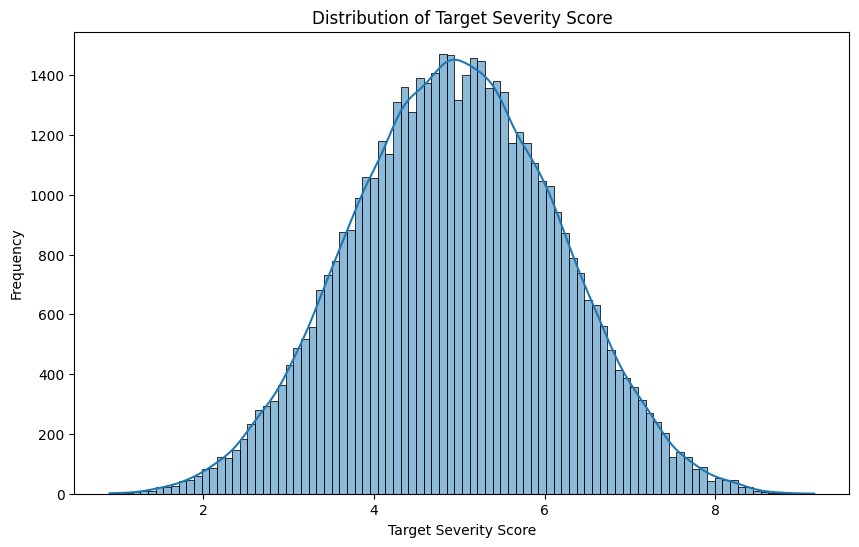

In [ ]:
#The values are symmetrically distributed.
#There’s no heavy skew, and
#There are no dominant peaks that would drown out other value ranges.

plt.figure(figsize=(10, 6))
sns.histplot(DATA['Target_Severity_Score'], kde=True)
plt.title('Distribution of Target Severity Score')
plt.xlabel('Target Severity Score')
plt.ylabel('Frequency')
plt.show()

DATA['Target_Severity_Score'].describe()


In [ ]:
## values are close to zeor means it is symmetric (well distributed)
from scipy.stats import skew, kurtosis
print("Skewness:", skew(DATA['Target_Severity_Score']))
print("Kurtosis:", kurtosis(DATA['Target_Severity_Score']))


Skewness: -0.0024531944339484476
Kurtosis: -0.2336036297008679


<Axes: xlabel='Target_Severity_Score'>

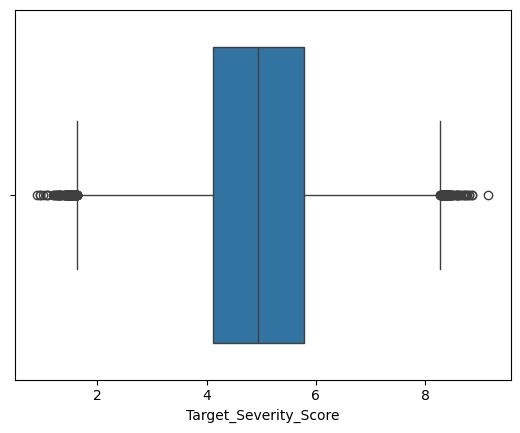

In [ ]:
## not that much outliers
sns.boxplot(x=DATA['Target_Severity_Score'])


In [ ]:
Q1 = DATA['Target_Severity_Score'].quantile(0.25)
Q3 = DATA['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1
filtered = DATA[(DATA['Target_Severity_Score'] >= Q1 - 1.5 * IQR) &
                (DATA['Target_Severity_Score'] <= Q3 + 1.5 * IQR)]


<Axes: xlabel='Target_Severity_Score'>

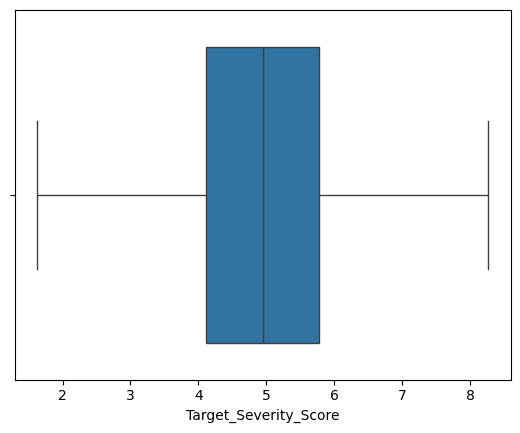

In [ ]:
sns.boxplot(x=filtered['Target_Severity_Score'])


## Correlation Analysis